Zunächst immer mathematische Bibliothek laden

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

Hier werden verschiedene Funktionen definiert (Sinus, Sinusquadrat, Rechteckpuls, Sägezahn)

In [2]:
#Verschiedene Signal Funktionen
def sinus(t,A,f):
    return A*np.sin(2*np.pi*f*t)

def sinus_quadrat(t,A,f):
    return A*np.sin(2*np.pi*f*t)**2

def rechteck(x,w,offset):
    s=-w/2+offset
    y=[]
    for p in x:
        if p >s and p < s+w:
            y.append(1)
        else:
            y.append(0)
    return np.array(y)

def saege(x,w):
    y=[]
    ymax=1
    m=ymax/w
    for p in x:
        y.append(m*p%w)
    return np.array(y)

Hier wird eine Zeitreihe angelegt und das Signal (sig) wird für die aktivierte Funktion berechnet

In [20]:
#Zeitachse und konstanten definieren

dt = 0.001
t=np.arange(-1,1,dt)

#sig=sinus(t,2,5)
#sig=sinus_quadrat(t,2,5)
sig=rechteck(t,1,0)
#sig=saege(t,0.2)

Nun wird in der ersten Zeile die diskrete Fouriertransformation der Funktionswerte durchgeführt. 
Danach werden die Ergebnisse in zwei Hälfen symmertisch um Null angeordnet. Diese Sortierung ist notwendig da der Algorithmus die Komponenten nach einem bestimmten Schema ausgiebt. 
Dokumentation: https://docs.scipy.org/doc/numpy/reference/routines.fft.html#module-numpy.fft

In [21]:
#Fouriertransformieren Doc: https://docs.scipy.org/doc/numpy/reference/routines.fft.html#module-numpy.fft
ft=np.fft.fft(sig)

#Umsortieren
N=int(len(ft)/2)
nft=np.concatenate((ft[N:],ft[:N]), axis=0)

Da in der diskreten Fouriertransformation ein konstanter Zeitschritt dt angenommen wird, werden nur die Koeffizienten ausgegeben. Im Folgenden wird die zugehörige Frequenzachse generiert.

In [22]:
#Frequenzachse erstellen
wu=np.fft.fftfreq(len(sig),dt)
#Umsortieren
w=np.concatenate((wu[N:],wu[:N]), axis=0)

#w-Werte mit koeffizienten Verknüpfen
fs=list(zip(w,nft))
#Array nach größten koeffizienten sortieren
fs.sort(key=lambda a:abs(a[1]),reverse=True)

Nun werden die Plots der einzelnen Funktionen erstellt.
Dokumentation der Plot Befehle: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html

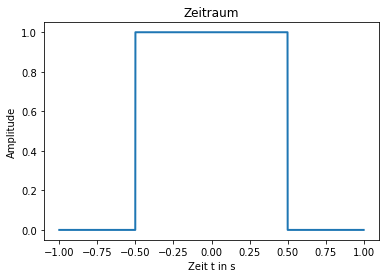

In [23]:
#Plot1
#SignalPlot Doc: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
fig, axes = plt.subplots()
axes.set_title("Zeitraum")
axes.set_xlabel("Zeit t in s")
axes.set_ylabel("Amplitude")
axes.plot(t,sig,linewidth=2)

Erstellen des Fourierplots mit Zoom. Um vollständigen Plot zu betrachten letzte Zeile auskommentieren!

[-25, 25, 0, 1000.0]

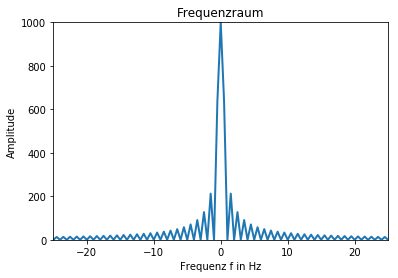

In [24]:
#Plot2
#FourierPlot vom Betrag
halb=len(t)/2
fenst=len(t)/20
unten=int(halb-fenst)
oben=int(halb+fenst)
fig, axes = plt.subplots()
axes.set_title("Frequenzraum")
axes.set_xlabel("Frequenz f in Hz")
axes.set_ylabel("Amplitude")
axes.plot(w,abs(nft),linewidth=2)
#Zoom in
axes.axis([-25,25,0,max(abs(nft))])

Erstellen des Rücktransformierten Plots. Um die Anzahl der Koeffizienten zu beeinflussen maxAnzFour ändern!

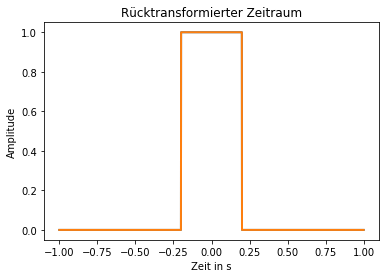

In [19]:
#Plot3
ys=[]
#Die Größten Koeffizienten Plotten
maxAnzFour=len(t)
for f in fs[:maxAnzFour]:
    #Rücktransformation von "Hand"
    y=f[1]*np.exp(1j*f[0]*t*2*np.pi)/len(t)
    #Umsortieren
    yn=np.concatenate((y[N:],y[:N]), axis=0)
    yr=np.real(yn)
    #Realteil der Rücktransformierten speichern
    ys.append(yr)
    #Plotten der einzelnen Funktionen
    #plt.plot(t,yr)
#Synthetisierte funktion initialisieren
synthsig=np.zeros(len(t))
for y in ys:
    #einzelne Rücktransformierte addieren
    synthsig=np.add(synthsig,y)
#Plotten der "Groben" Funktion
fig, axes = plt.subplots()
axes.set_title("Rücktransformierter Zeitraum")
axes.set_xlabel("Zeit in s")
axes.set_ylabel("Amplitude")
axes.plot(t,synthsig,linewidth=2)
axes.plot(t,sig,linewidth=2)